<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1>Assignment: Machine Learning Prediction</h1>

Estimated time needed: **60** minutes

Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.

<h2 id = objectives> Objectives</h2>

\- Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


<h2 id = lib>Import Libraries and Aux functions</h2>

In [1]:
# Libraries for the manipulation of data manipulation and analysis, the dataframes and the ndimensional arrays
import pandas as pd
import numpy  as np
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from typing import Union

import time

In [2]:
def plot_confusion_matrix(
        y:Union[np.ndarray,pd.Series],
        y_predict:Union[np.ndarray,pd.Series]) -> plt.Axes:
    
    '''this function plots the confusion matrix
    '''
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

<h2 id = load>Load the DataFrame</h2>

Loading the data from a link to provide consistency through the answers. Also, we can use the data processed in the previous labs to compare

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Dataset with all the data 
data = pd.read_csv(URL1)
datan = pd.read_csv('datasets/dataset_part_2.csv',header = 0)

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
# Dataframe for the features 
urlf = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(urlf)
X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [6]:
# Create an empty list to check the performance of the models
time_list = []

<h2 id = tasks>Tasks for the lab</h2>

<h3 id = task1>Task 1: Create the target feature </h3>

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [7]:
Y = data['Class'].to_numpy()


<h3 id = task2>Task 2: Standardize the feature data</h3>

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [8]:
tr = StandardScaler()
X_n = tr.fit_transform(X)
X_n

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.

<h3 id = task3>Task 3: Split of the data -Train and Test</h3>

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

<code>X_train, X_test, Y_train, Y_test</code>

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_n,Y,test_size = 0.2, random_state = 2)

print(f'Length of train data: {X_train.shape[0]}\nLength of test data: {X_test.shape[0]}')

Length of train data: 72
Length of test data: 18


<h3 id = task4>Task 4: Logistic Regression with GridSearchCV</h3>

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [10]:
# Parameters for the gridsearch and crossvalidation
parameters  = {'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']} # l1 lasso l2 ridge

# Initialize the instance of the Logistic Regression
lr = LogisticRegression()
# Initialize the instances of the gridsearchcv
logreg_cv = GridSearchCV(lr,parameters,cv = 10)

# Fit of the train data
ti = time.time()
logreg_cv.fit(X_train,Y_train)
tf = time.time()

time_list.append(tf-ti)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.

In [11]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


<h3 id = task5>Task 5: Accuracy of the model</h3>

Calculate the accuracy on the test data using the method <code>score</code>:

In [12]:
logreg_cv.score(X_test,Y_test)

0.8333333333333334

Lets look at the confusion matrix:

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives.

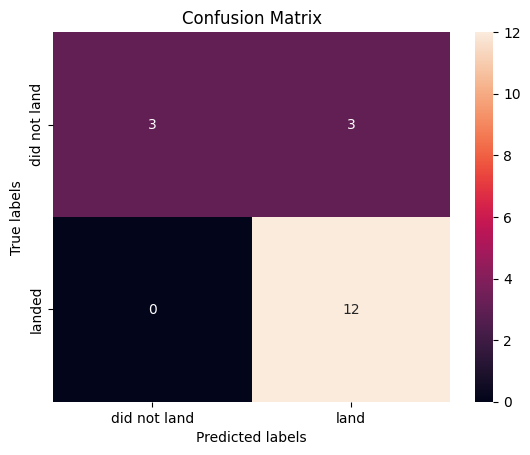

In [13]:
# We make the prediction of the best_estimator of the grid search with the grid test
yhat = logreg_cv.predict(X_test)

# Plot of the confusion matrix
plot_confusion_matrix(Y_test,yhat)

<h3 id = task6>Task 6: Support Vector Machine Classification</h3>

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [14]:
# The parameters to vary is the kernel of the vectors, the control regularization and the scale
parameters = {'kernel':['linear', 'rbf','poly','rbf', 'sigmoid'],
              'C': np.logspace(-3, 3, 5).tolist(),
              'gamma':np.logspace(-3, 3, 5).tolist()}
# Initialize the instance of the support vector machine classifier 
svm = SVC()
# Make the instance of the grid search with a 10 fold cross validation
svm_cv = GridSearchCV(svm,parameters,cv = 10)

ti = time.time()
svm_cv.fit(X_train,Y_train)
tf = time.time()

time_list.append(tf-ti)

In [15]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


<h3 id = task7>Task 7: Accuracy of the SVC model</h3>

Calculate the accuracy on the test data using the method <code>score</code>:
 
And we plot the confusion matrix

In [16]:
svm_cv.score(X_test,Y_test)

0.8333333333333334

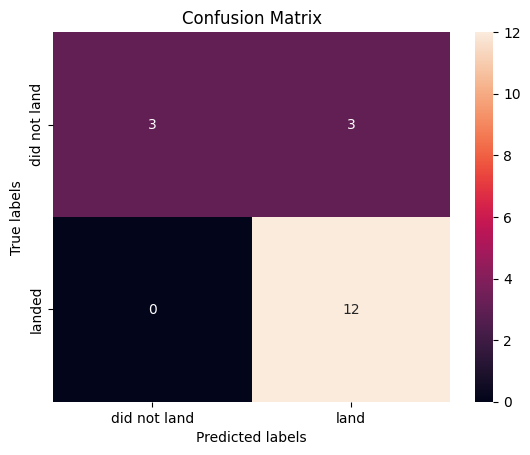

In [17]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<h3 id = task8>Task 8: Decision Tree Classifier</h3>

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [18]:
# Vary the criterion for optimization, the splitter of elements and the features(order of features), 
# max depth of th tree, max features of features min samples necessary for the lead and min samples to split the data.
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [ 'log2','sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Initialize the instance of the decision tree
tree = DecisionTreeClassifier()
# Initialize the grid search of cross validation of 10 fold 
tree_cv = GridSearchCV(tree,parameters, cv = 10)

In [19]:
# Train with the train data
ti = time.time()
tree_cv.fit(X_train,Y_train)
tf = time.time()

time_list.append(tf-ti)

In [20]:
print("tuned hyperparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8892857142857145


<h3 id = task9>Task 9: Accuracy of the Decision tree Classifier</h3>

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

And, we plot the confusion matrix:

In [21]:
tree_cv.score(X_test,Y_test)

0.8888888888888888

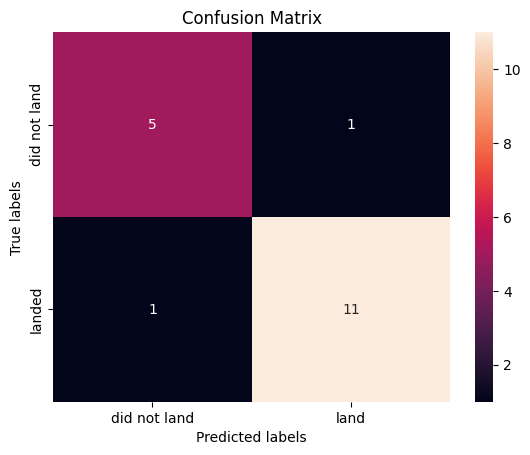

In [22]:
yhattree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhattree)

<h3 id = task10>Task 10: K-Nearest Neighbors Classifier</h3>

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [23]:
# The parameters to change is the number of neighbors, the type of algorithm and the power 
# of the minkowsky parameter, that modifies the metric of the distance

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Initialize the instance of the K-nearest neighbors
KNN = KNeighborsClassifier()

# Initialize the grid search 10 fold 
knn_cv = GridSearchCV(KNN, parameters, cv = 10)

In [24]:
# The training of the model with the datasets
ti = time.time()
knn_cv.fit(X_train,Y_train)
tf = time.time()

time_list.append(tf-ti)

In [25]:
print("tuned hyperparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


<h3 id = task11>Task 11: Accuracy of the KNN Classifier</h3>

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:

And, we plot the confusion matrix

In [26]:
knn_cv.score(X_test, Y_test)

0.8333333333333334

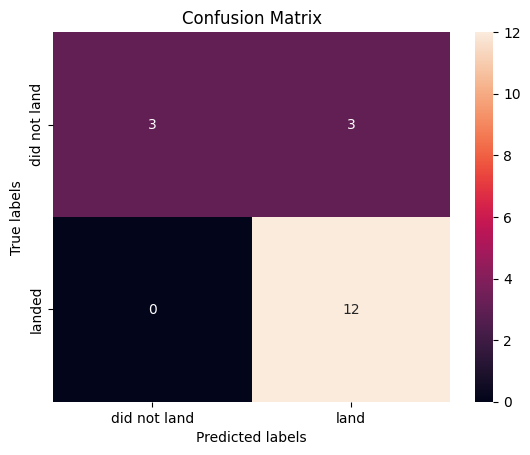

In [27]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<h3 id = task12>Task 12: Find the best model performance </h3>

Find the method performs best:


In [28]:
from sklearn.metrics import jaccard_score,f1_score

In [29]:
models_grid = [logreg_cv,svm_cv,tree_cv,knn_cv]

r2score = []
jaccardscore = []
F1score = []

for model in models_grid:
    n_model = model.best_estimator_

    r2score.append(n_model.score(X_test,Y_test))
    jaccardscore.append(jaccard_score(Y_test,n_model.predict(X_test)))
    F1score.append(f1_score(Y_test,n_model.predict(X_test)))

In [30]:
metrics_df = pd.DataFrame({'R^2 score': r2score, 'Jaccard Score':jaccardscore,
                            'F1 Score':F1score ,'Time performance': time_list}, index = ['Logistic Regression','SVM','Decision Tree','K-Nearest Neighbor'])
metrics_df

,R^2 score,Jaccard Score,F1 Score,Time performance
Logistic Regression,0.833333,0.800000,0.888889,0.102998
SVM,0.833333,0.800000,0.888889,2.115396
Decision Tree,0.888889,0.846154,0.916667,7.911764
K-Nearest Neighbor,0.833333,0.800000,0.888889,1.687017


In [37]:
metrics_df.reset_index(inplace=True)

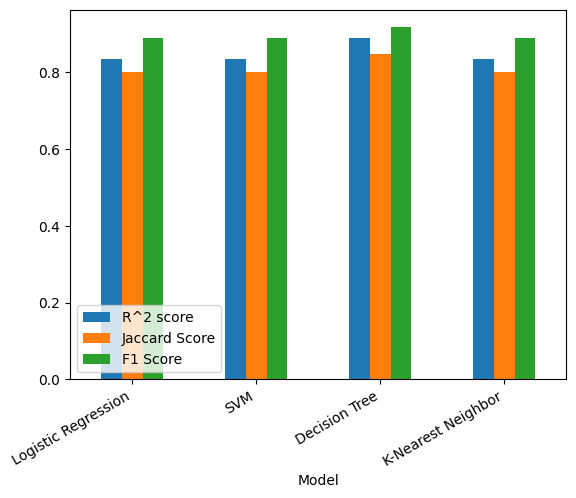

In [77]:
metrics_df[['index','R^2 score','Jaccard Score','F1 Score']].plot(kind = 'bar', x = 'index')
plt.xlabel('Model')
plt.legend(loc = 'lower left')
plt.xticks(rotation=30, ha='right')
plt.show()

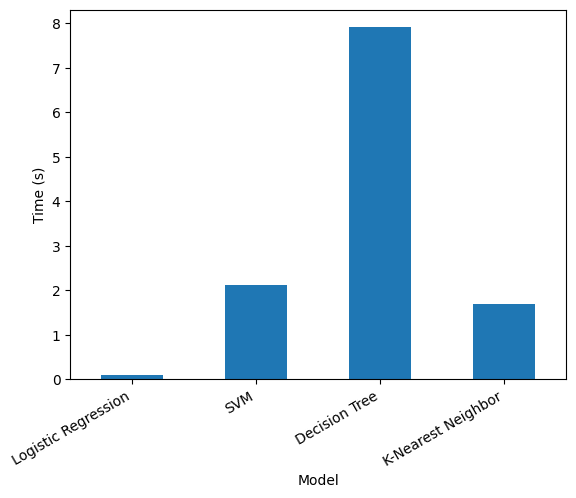

In [76]:
metrics_df[['index','Time performance']].plot(kind = 'bar', x = 'index', legend=False)
plt.xlabel('Model')
plt.ylabel('Time (s)')
plt.xticks(rotation=30, ha='right')
plt.show()